In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas import Series, DataFrame
from fastai.vision.all import *

In [2]:
train_df = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_train.csv')
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test_df = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_test.csv')
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
label_description = {
0: 'T-shirt/top',
1: 'Trouser',
2: 'Pullover',
3: 'Dress',
4: 'Coat',
5: 'Sandal',
6: 'Shirt',
7: 'Sneaker',
8: 'Bag',
9: 'Ankle boot'}

In [6]:
train_grouped = train_df.groupby('label')
means_list = {}
samples = {}

for label, group in train_grouped:
    means_list[label] = group.drop('label', axis=1).values

for label, array in means_list.items():
        tensors = [torch.tensor(o.reshape((28,28))) for o in array]
        stacked = torch.stack(tensors) / 255
        samples[label] = stacked[0]
        mean = stacked.mean(0)
        means_list[label] = mean

Another way of doing it:
```python
means_list = {label: torch.stack([torch.tensor(o.reshape((28,28))) for o in array])
                for label, array in means_list.items()}
means_list = {label: array.mean(0) for label, array in means_list.items()}
       

In [7]:
means = torch.stack([means_list[i] for i in range(10)], axis=0)
for i in range(10):
    if not torch.all(means[i] == means_list[i]):
        print(f'False: {i}')
print('All good!')

All good!


# A sample of each item

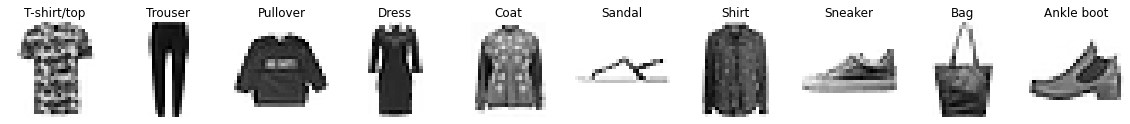

In [8]:
fig, axs = plt.subplots(1, 10, figsize=(20,10))
axs = axs.ravel()

for i in range(10):
    axs[i].imshow(samples[i], cmap='Greys')
    axs[i].set_title(f'{label_description[i]}')
    axs[i].axis('off')
plt.show()

# Mean of each clothing item

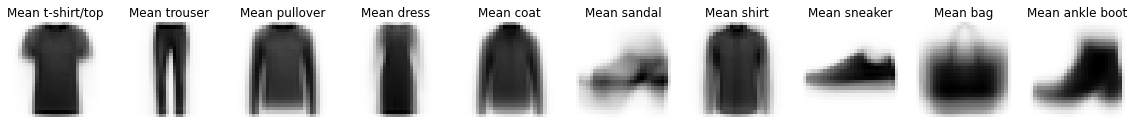

In [9]:
fig, axs = plt.subplots(1, 10, figsize=(20,10))
axs = axs.ravel()

for i in range(10):
    axs[i].imshow(means[i], cmap='Greys')
    axs[i].set_title(f'Mean {label_description[i].lower()}')
    axs[i].axis('off')
plt.show()

In [11]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))

In [12]:
test_labels = test_df.loc[:,'label']
test_img_df = test_df.loc[:, test_df.columns != 'label']

In [13]:
test_images = torch.stack([torch.tensor(o.reshape((28,28))) / 255 for o in test_img_df.values])

# Create baseline with average items

In [15]:
distances_dict = {}
for label in range(10):
    distances_dict[label] = mnist_distance(test_images,means[label])

In [16]:
distances = []
distances = torch.stack([distances_dict[i] for i in range(10)], axis=0)
transposed_dist = distances.transpose(0,1)

In [17]:
baseline_guesses = [1 if torch.argmin(transposed_dist[i]) == test_labels[i] else 0 for i in range(10000)]
    
baseline_accuracy = np.mean(baseline_guesses)

## Baseline accuracy is

In [18]:
baseline_accuracy

0.6081